In [1]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)

In [2]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

In [3]:
#select all model
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)

In [6]:
models = modelsLake[grepl("*fourier*", modelsLake)]
load(models[1])
model

$model.name
[1] "fourier"

$F
function (series, par) 
{
    freq.cutoff = unlist(par[1])
    coeffs = fft(series)
    mags = coeffs[1:(length(coeffs)/2)]
    mags = 1 + sqrt(Re(mags)^2 + Im(mags)^2)
    o.idx = order(mags, decreasing = T)
    idx = (1:length(mags))[-o.idx[1:freq.cutoff]]
    coeffs[idx] = complex(real = 0, imaginary = 0)
    coeffs[length(coeffs) - idx + 1] = complex(real = 0, imaginary = 0)
    det = Re(fft(coeffs, inverse = T))/length(series)
    return(det)
}

$best.param
[1] cutoff m      d     
<0 rows> (or 0-length row.names)

$eval
   testId    tech paramIdx   param        mddl     mae_md    rmse_md
13      1 fourier       13 13,2,20 0.009603116 0.00397581 0.00288577
           mae        rmse      dist
13 0.002331628 0.002014058 0.2111407

In [13]:
models = modelsLake[grepl("*fourier*", modelsLake)]
testData = data.frame()
for(i in 1:length(models)){
    load(models[i])
    if (i == 1) { 
        testData = model$eval
    } else { 
        testData = merge(testData, model$eval, all.x = TRUE, all.y = TRUE) 
    } 
    
}
testData

testId,tech,paramIdx,param,mddl,mae_md,rmse_md,mae,rmse,dist
1,fourier,13,"13,2,20",0.009603116,0.003975810,0.002885770,0.002331628,0.002014058,0.211140677
2,fourier,23,"23,2,20",0.006855065,0.001635695,0.101292002,0.002837965,0.001918032,0.375727017
3,fourier,12,"12,2,20",0.004375938,0.005390558,0.006184878,0.007048695,0.007626179,0.294967448
4,fourier,7,"7,2,20",0.006400515,0.010683388,0.012322935,0.013915728,0.015208541,0.061195933
5,fourier,48,"48,2,20",0.025899947,0.030393446,0.035355330,0.038700007,0.045255164,0.272933587
6,fourier,48,"48,2,20",0.032663714,0.040509261,0.046886886,0.051491330,0.060155156,0.127193686
7,fourier,26,"26,2,20",0.180989056,-0.586957064,-0.032899253,2.214682484,0.121845626,0.198416318
8,fourier,48,"48,2,20",0.015532304,0.017443998,0.020253564,0.022108735,0.024480732,0.103633441
9,fourier,9,"9,2,20",0.316238955,0.316615161,0.316611855,0.316705696,0.316874775,0.239511559
10,fourier,9,"9,2,20",0.315419414,0.316102539,0.316169197,0.316381482,0.316766219,0.131636899


In [14]:
models = modelsLake[grepl("*wavelets*", modelsLake)]
testData = data.frame()
for(i in 1:length(models)){
    load(models[i])
    if (i == 1) { 
        testData = model$eval
    } else { 
        testData = merge(testData, model$eval, all.x = TRUE, all.y = TRUE) 
    } 
    
}
testData

testId,tech,paramIdx,param,mddl,mae_md,rmse_md,mae,rmse,dist
1,wavelet,76,"haar,4,periodic,2,20",0.0005776247,0.28834828,0.3103185,0.0043282667,0.64109463,0.059893758
2,wavelet,91,"la18,4,periodic,2,20",0.1539261763,0.67423687,0.2408742,-0.1106290546,-0.71238468,0.261923873
3,wavelet,161,"la8,7,periodic,2,20",0.0088114908,-0.34425091,0.4175732,0.0002028299,-0.03114670,0.230998077
4,wavelet,241,"la18,1,reflection,2,20",0.0588723868,0.60518008,0.3399062,0.7416481162,1.09549608,0.037751705
5,wavelet,186,"la8,8,periodic,2,20",0.1494812697,0.70444071,0.5393242,-1.2091645686,-0.83750191,0.360249866
6,wavelet,131,"d12,6,periodic,2,20",0.2377870626,0.01760641,0.2299547,-1.7360947409,-0.88897231,0.277839213
7,wavelet,61,"la8,3,periodic,2,20",-0.1546965300,0.10569740,0.3152927,0.8919912219,-0.39006778,0.414791995
8,wavelet,276,"haar,3,reflection,2,20",0.1950224656,-0.76917047,0.2637526,1.2361101433,1.01536500,0.256763248
9,wavelet,116,"la18,5,periodic,2,20",0.0908809382,-0.54057624,0.3767302,1.1231722994,0.51918621,0.132024426
10,wavelet,248,"c18,1,reflection,2,20",0.1060032057,1.18500836,0.1538005,0.0538777019,1.00831516,0.339064132


In [7]:
models = modelsLake[grepl("*SSA*", modelsLake)]
testData = data.frame(matrix(nrow = length(models), ncol = 3, dimnames=list(c(), c('timeSeries', 'mda', 'mddl'))))
for(i in 1:length(models)){
    load(models[i])
    testData[i,] = c(models[i], model$mda, model$mddl)
}
mda  = rbind(mda,  as.numeric(testData$mda))
mddl = rbind(mddl, as.numeric(testData$mddl))
testData

timeSeries,mda,mddl
model/SSA_01.RData,2.4318328152956e-18,0
model/SSA_02.RData,0.00148838126840462,0.922966340973975
model/SSA_03.RData,0.00605915054153074,1.56076634724597
model/SSA_04.RData,0.0121167648261607,1.80075858748323
model/SSA_05.RData,0.01704766934424,2.49211808261113
model/SSA_06.RData,0.0229310782716361,2.65456940809633
model/SSA_07.RData,0.0283039471706968,2.69061103945768
model/SSA_08.RData,0.00270566098855916,1.11095713154224
model/SSA_09.RData,0.0112296078130942,1.65494155784011
model/SSA_10.RData,0.029178921370966,2.46438281992278


In [8]:
models = modelsLake[grepl("*EMDMI*", modelsLake)]
testData = data.frame(matrix(nrow = length(models), ncol = 3, dimnames=list(c(), c('timeSeries', 'mda', 'mddl'))))
for(i in 1:length(models)){
    load(models[i])
    testData[i,] = c(models[i], model$mda, model$mddl)
}
mda  = rbind(mda,  as.numeric(testData$mda))
mddl = rbind(mddl, as.numeric(testData$mddl))
testData

timeSeries,mda,mddl
model/EMDMI_01.RData,0.920021324720814,105.306699148219
model/EMDMI_02.RData,0.919821648591727,237.86980149249
model/EMDMI_03.RData,0.921176630558081,341.880449258895
model/EMDMI_04.RData,0.919715731542314,213.773696472766
model/EMDMI_05.RData,0.921182456957036,143.625086270992
model/EMDMI_06.RData,0.936043302887049,256.838252393262
model/EMDMI_07.RData,0.95179640640266,212.694955375578
model/EMDMI_08.RData,0.919956246991852,196.421441162469
model/EMDMI_09.RData,0.923659120193079,230.902991295364
model/EMDMI_10.RData,0.916355239281702,88.6986121030124


In [9]:
models = modelsLake[grepl("*EMDRP*", modelsLake)]
testData = data.frame(matrix(nrow = length(models), ncol = 3, dimnames=list(c(), c('timeSeries', 'mda', 'mddl'))))
for(i in 1:length(models)){
    load(models[i])
    testData[i,] = c(models[i], model$mda, model$mddl)
}
mda  = rbind(mda,  as.numeric(testData$mda))
mddl = rbind(mddl, as.numeric(testData$mddl))
testData

timeSeries,mda,mddl
model/EMDRP_01.RData,0,0
model/EMDRP_02.RData,0.00410211650902861,2.48101208105592
model/EMDRP_03.RData,0.0146832261148527,2.29556111375759
model/EMDRP_04.RData,0.0301882947885183,2.40354508668214
model/EMDRP_05.RData,0.0500130076778014,3.75176281644645
model/EMDRP_06.RData,0.0464066044419264,4.32295471799246
model/EMDRP_07.RData,0.0558707007632858,6.76372571107831
model/EMDRP_08.RData,0.00559873559880968,2.18740248794566
model/EMDRP_09.RData,0.0615442452373114,2.59148645331421
model/EMDRP_10.RData,0.0402076213270772,3.03785193128285


pdf 
  2

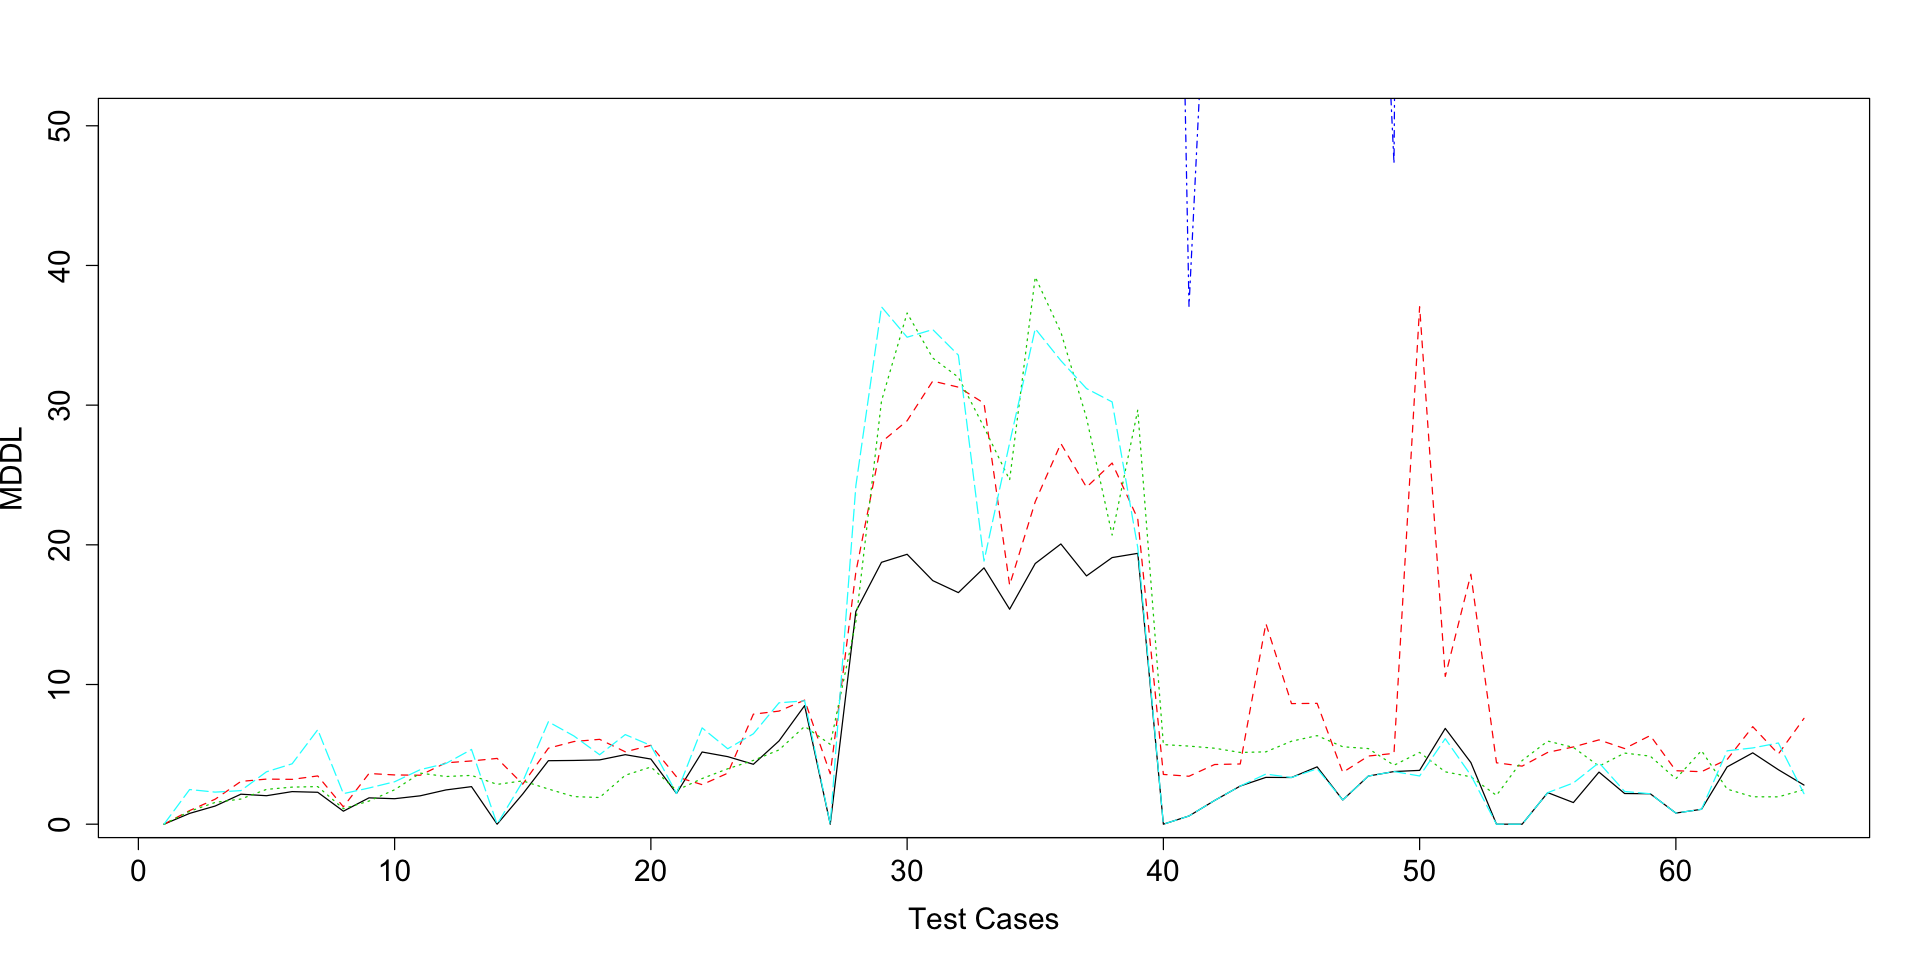

In [13]:
options(repr.plot.width=16, repr.plot.height=8)
matplot(t(mddl), t="l", axes = F, xlab="", ylab="", ylim=c(1,50))
title(sub="", xlab="Test Cases", ylab="MDDL", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

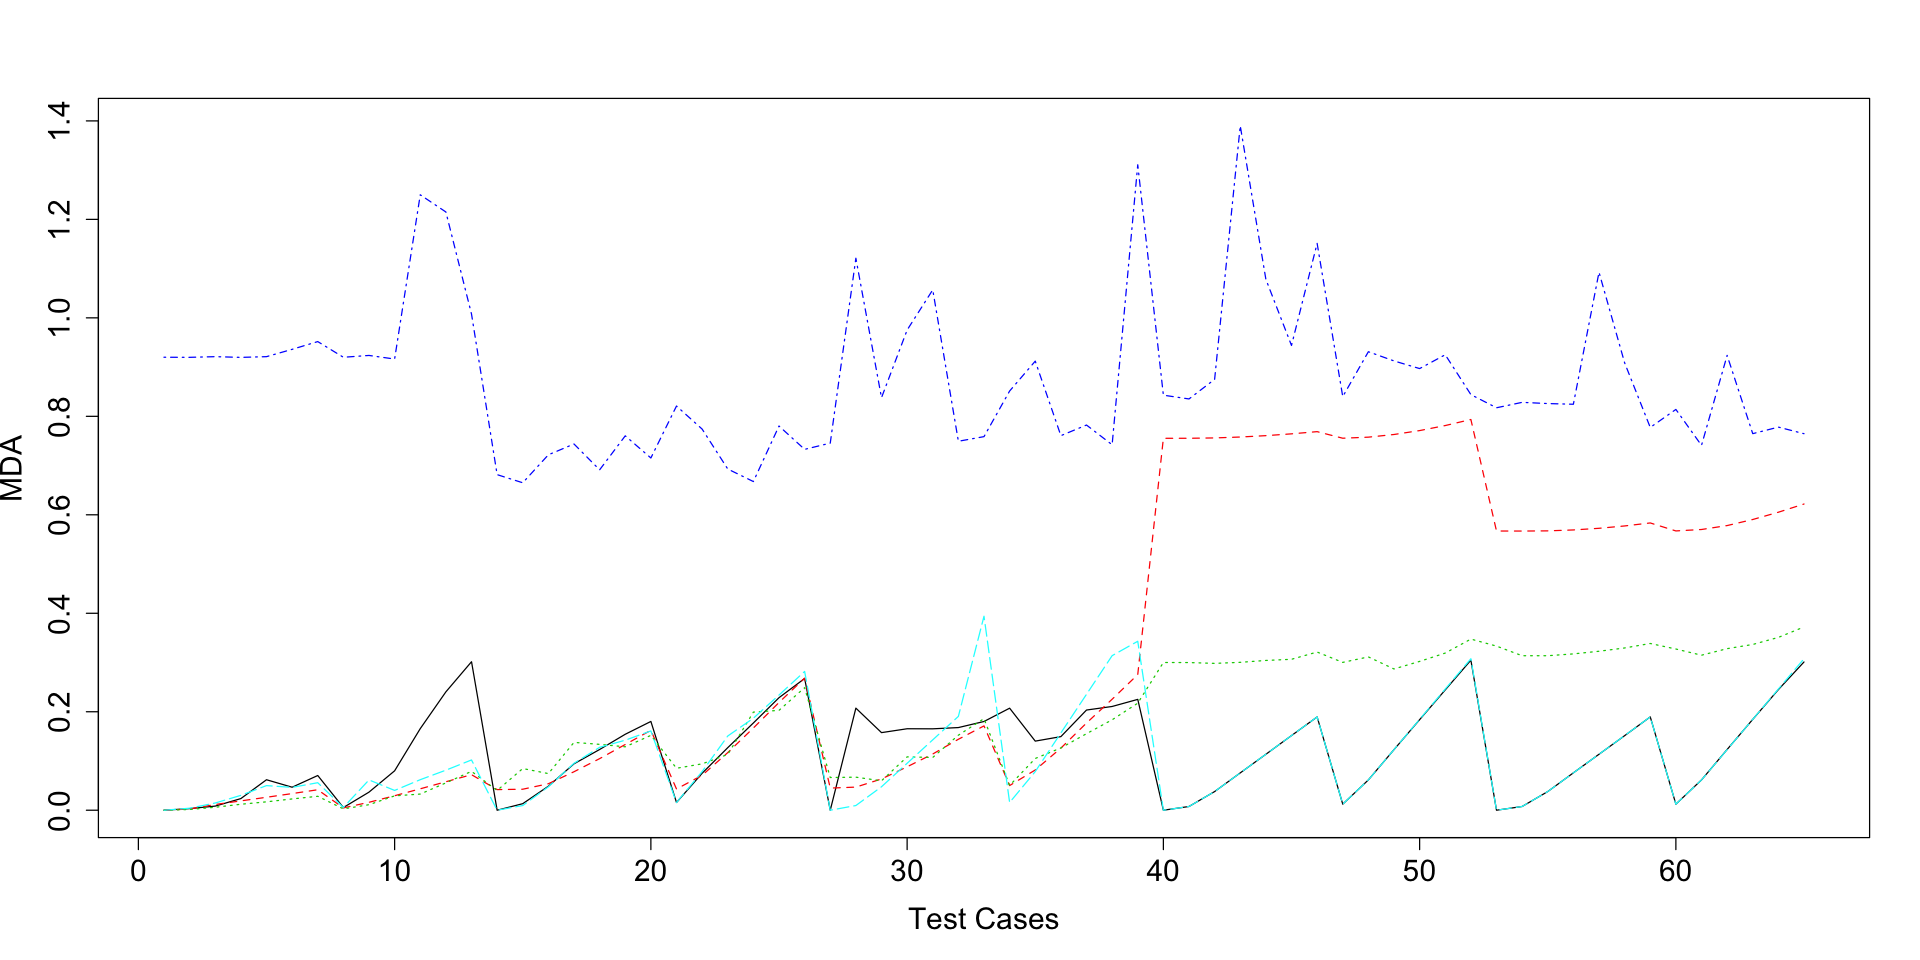

In [11]:
options(repr.plot.width=16, repr.plot.height=8)
matplot(t(mda), t="l", axes = F, xlab="", ylab="")
title(sub="", xlab="Test Cases", ylab="MDA", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"result_mda.pdf", sep='/'), width=16, height=5)

---
Boxplot Techniques
===

png 
  2

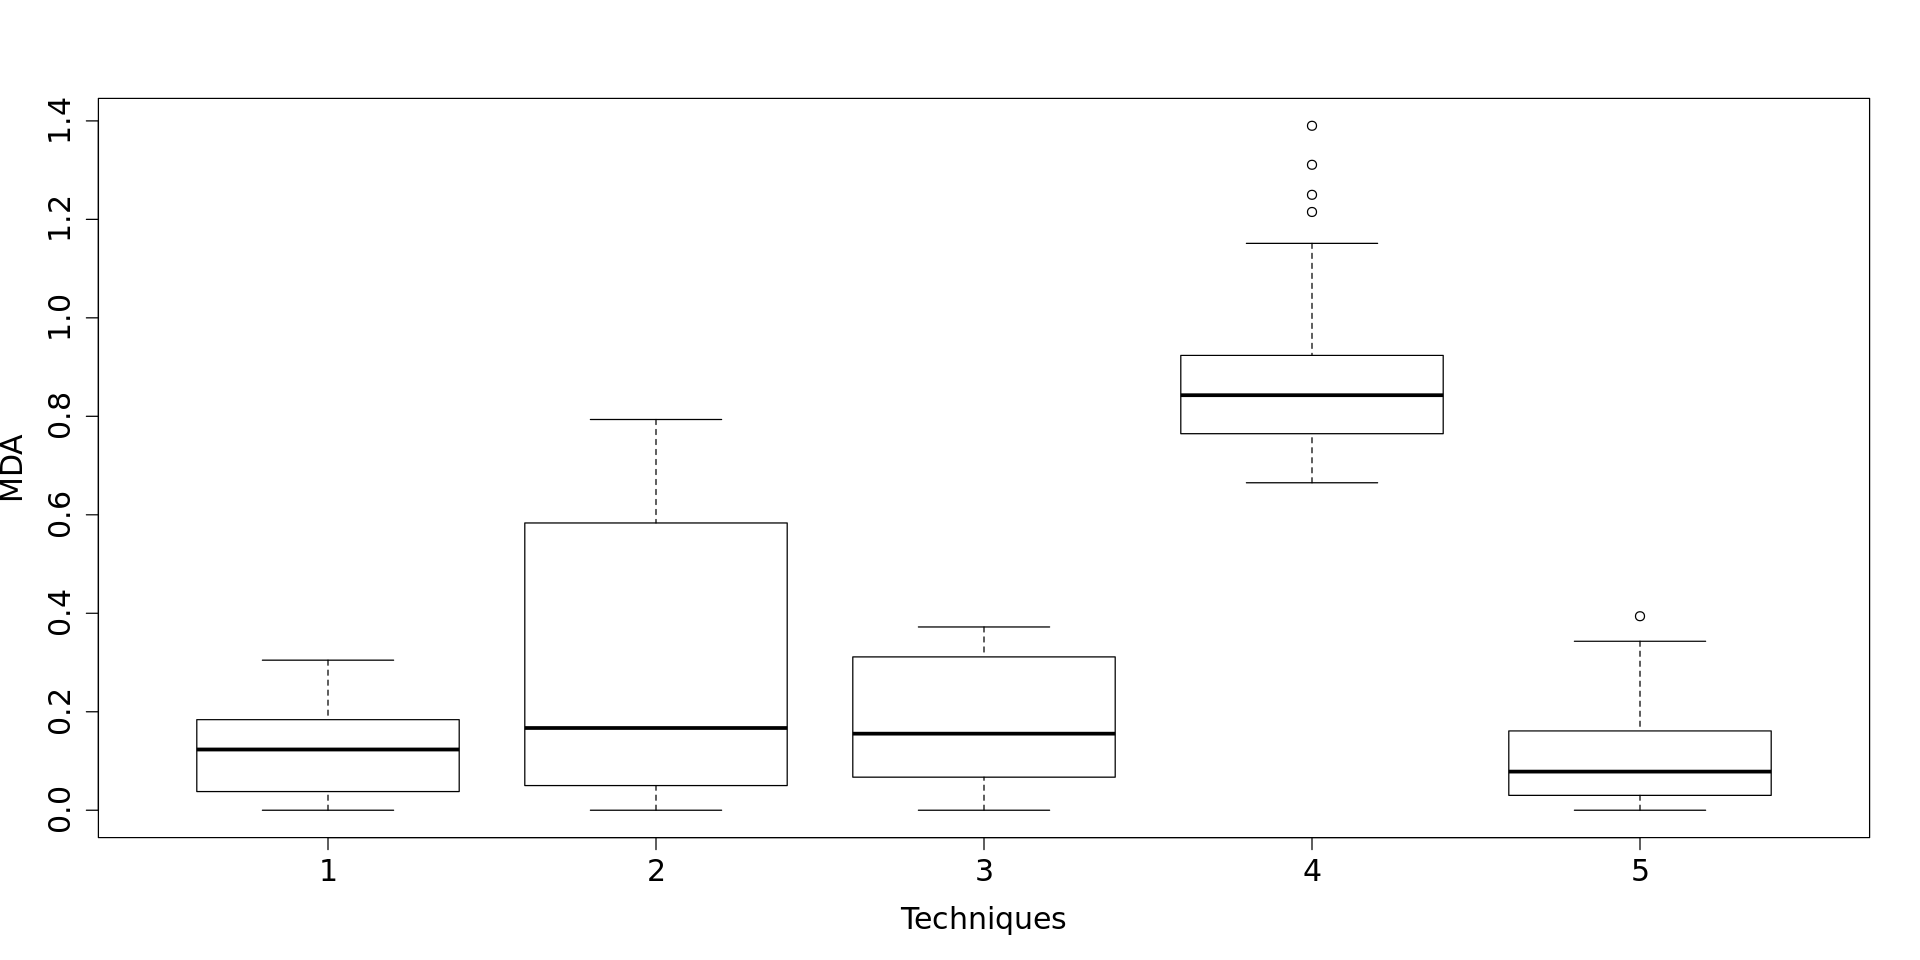

In [28]:
options(repr.plot.width=16, repr.plot.height=8)
boxplot(t(mda), t="l", axes = F, xlab="", ylab="")
title(xlab="Techniques", ylab="MDA", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"result_mda_techniques.pdf", sep='/'), width=16, height=5)

png 
  2

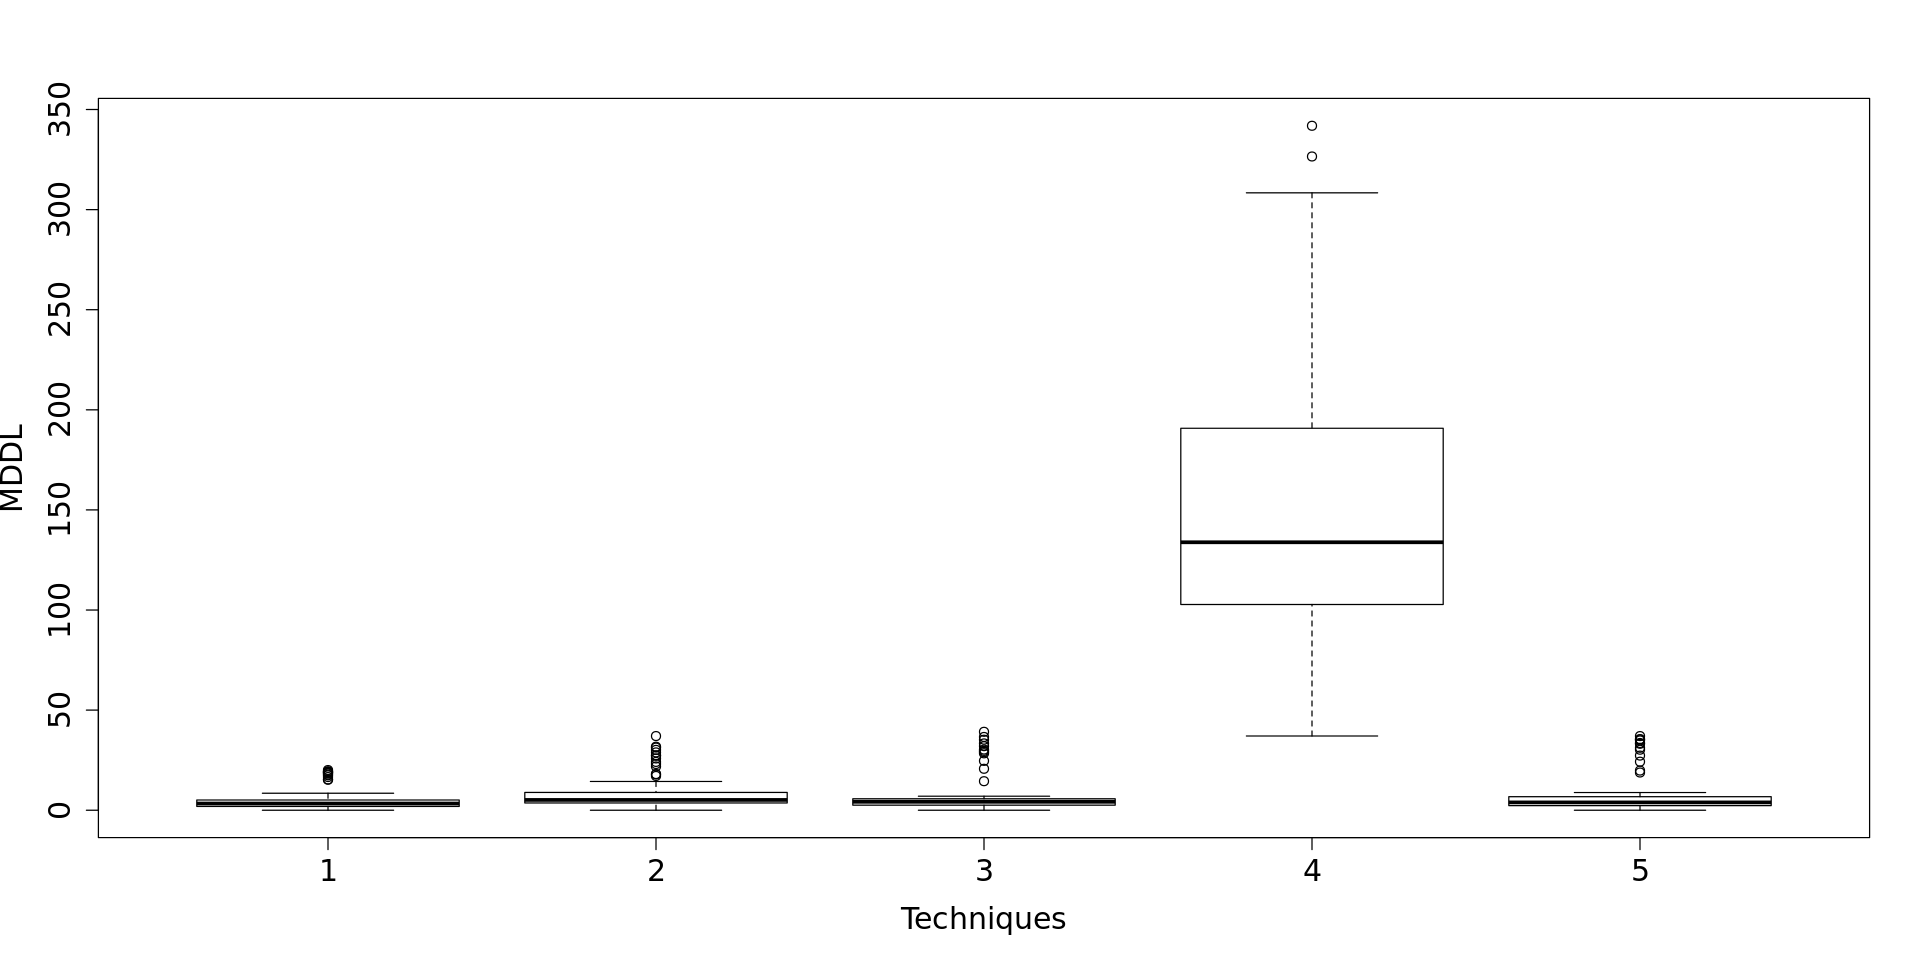

In [29]:
options(repr.plot.width=16, repr.plot.height=8)
boxplot(t(mddl), t="l", axes = F, xlab="", ylab="")
title(xlab="Techniques", ylab="MDDL", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"result_mddl_techniques.pdf", sep='/'), width=16, height=5)